##   🏡 Concrete Strength Prediction: From Exploration to Modeling 🏗️

*_A Regression Project by Zaid. N. Ansari_*

---

<br>

##   1\. 🧐 Project Initialization: Library Imports

We begin by importing the necessary Python libraries. These tools will help us handle data, perform calculations, visualize information, build machine learning models, and evaluate their performance.

In [1]:
import pandas as pd
from numpy import log1p, mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

scores = pd.DataFrame(columns=['Model', 'Cross Validation Score', 'Train R²', 'Test R²', '|| Diff ||'])

---

<br>

##   2\. 📥 Data Loading and Inspection

In this step, we load the concrete strength dataset from a CSV file. We then identify the features (input variables) and the target variable ('strength', which is what we want to predict). Finally, we display the first few rows of the data to get an initial look at its contents.

<br>

---

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/Concrete.csv')
features = df.columns[:-1].tolist()
target = 'strength'
df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1030 rows x 9 columns]

---

<br>

##   3\. 📊 Initial Data Exploration: Box Plots

The following code was designed to create box plots. Box plots are a useful way to visualize the distribution of data and identify potential outliers (extreme values).

<br>

---

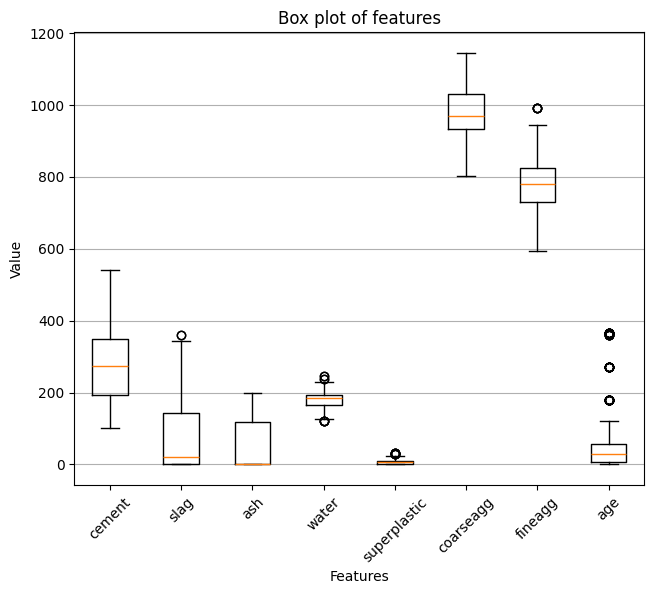

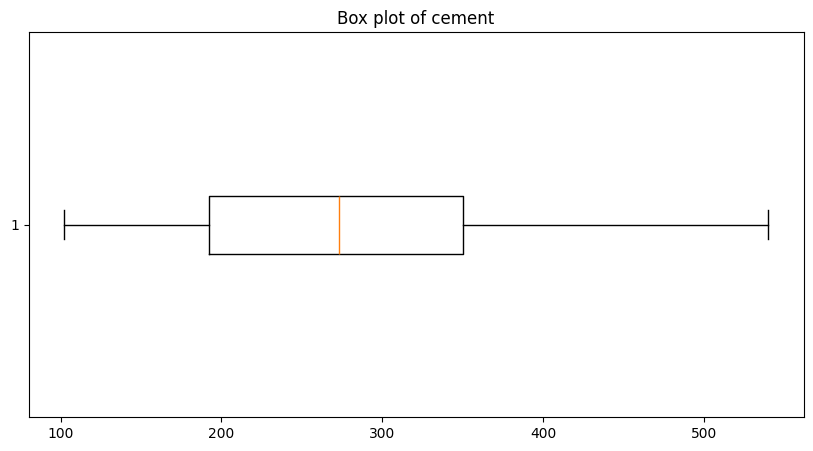

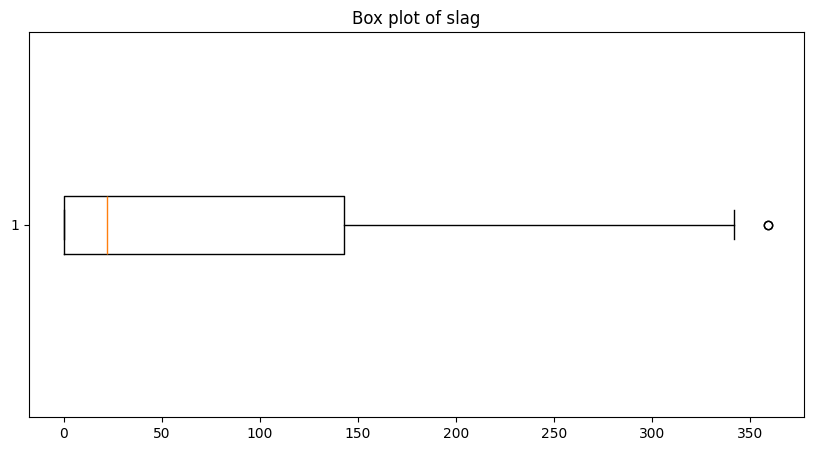

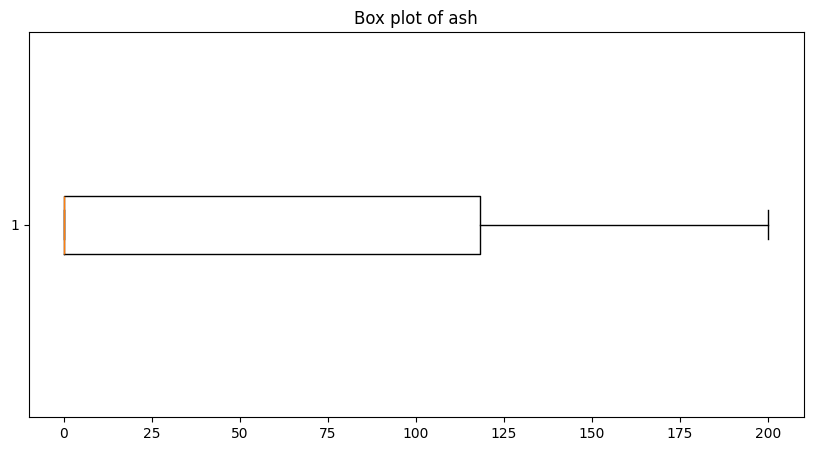

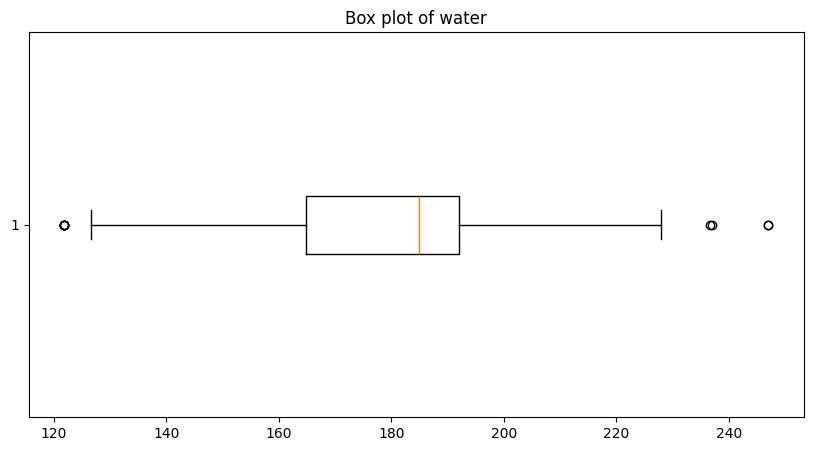

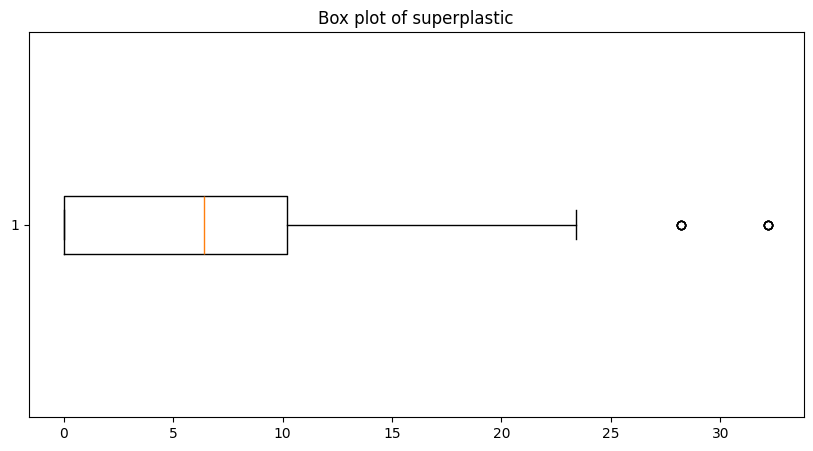

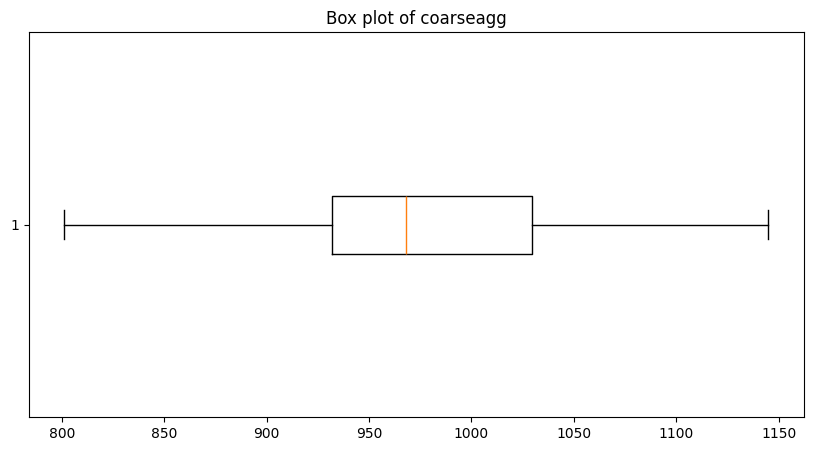

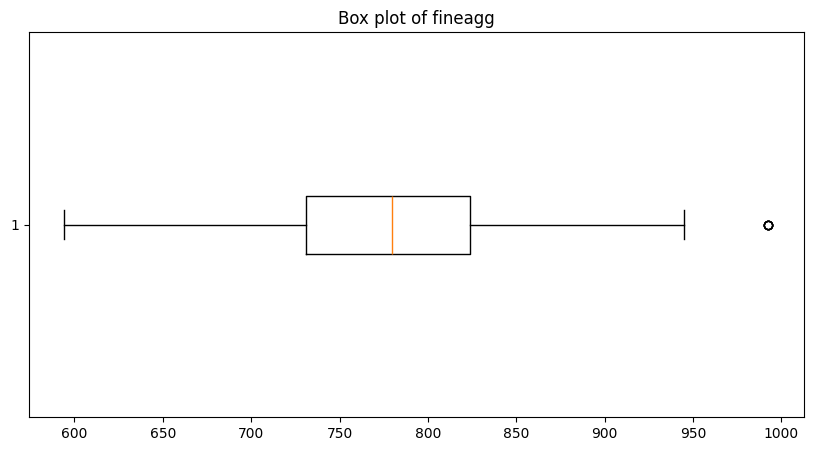

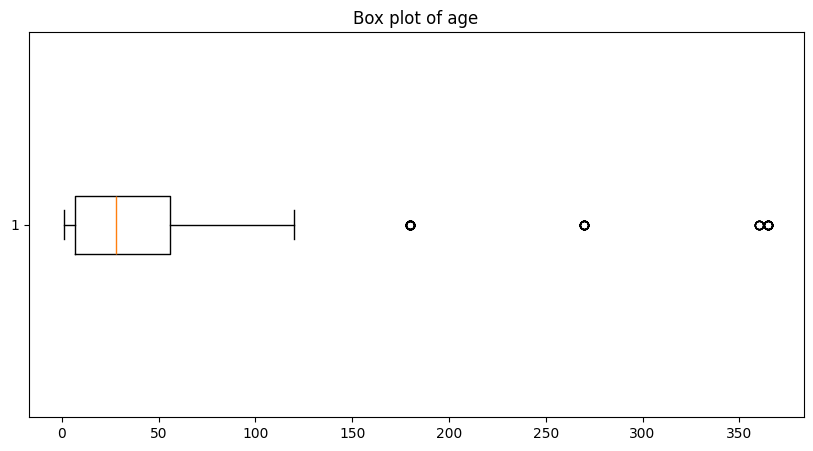

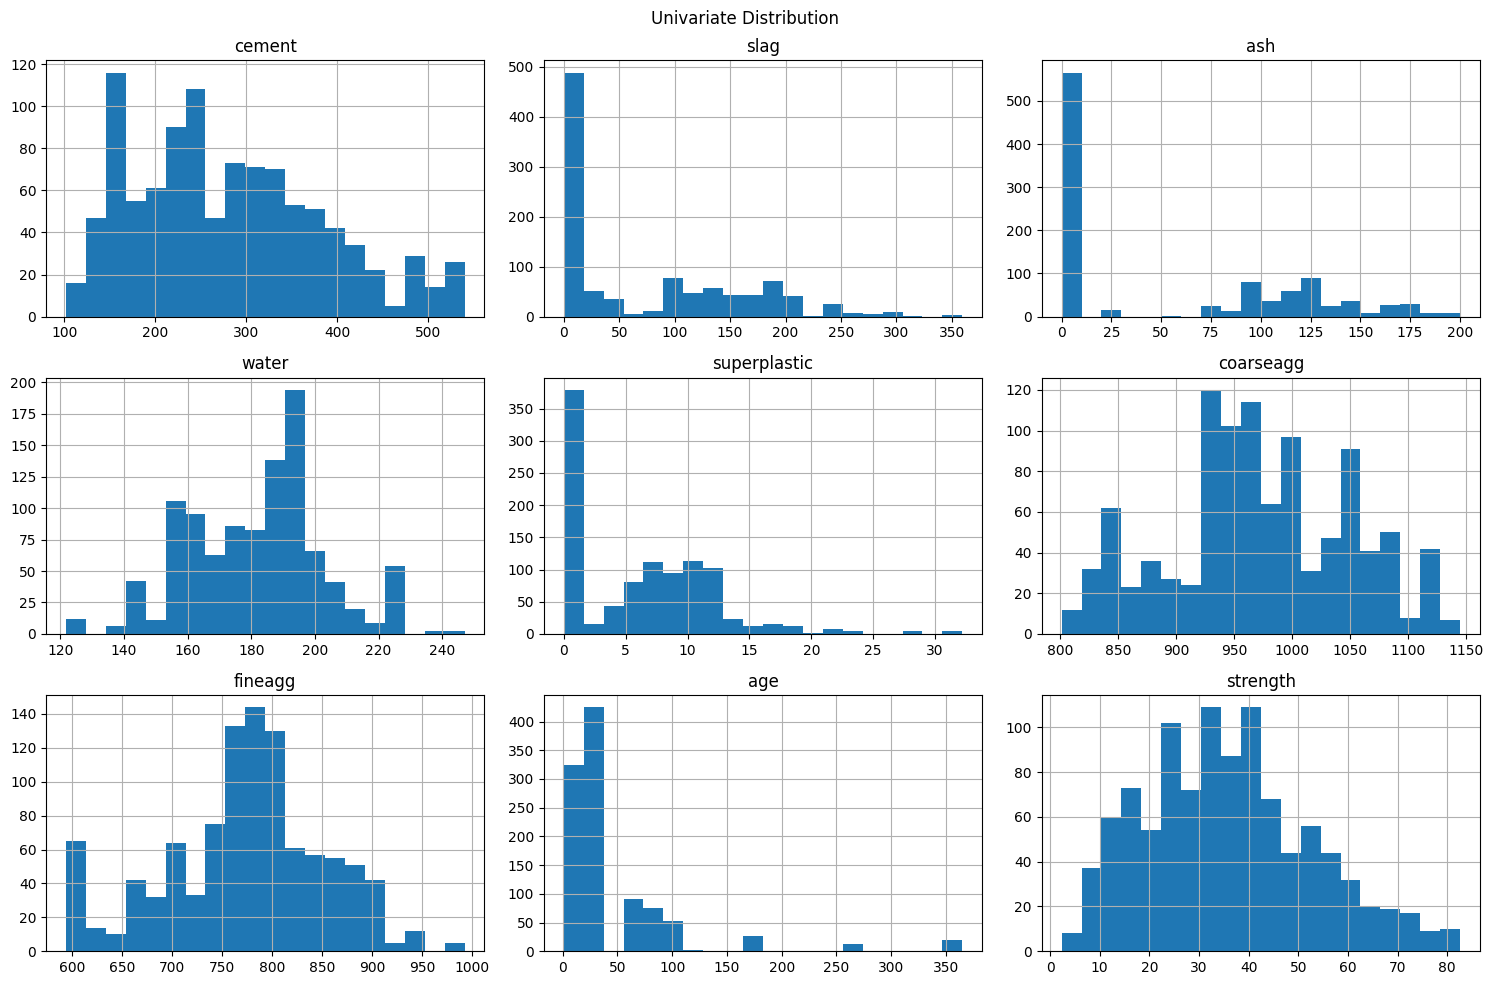

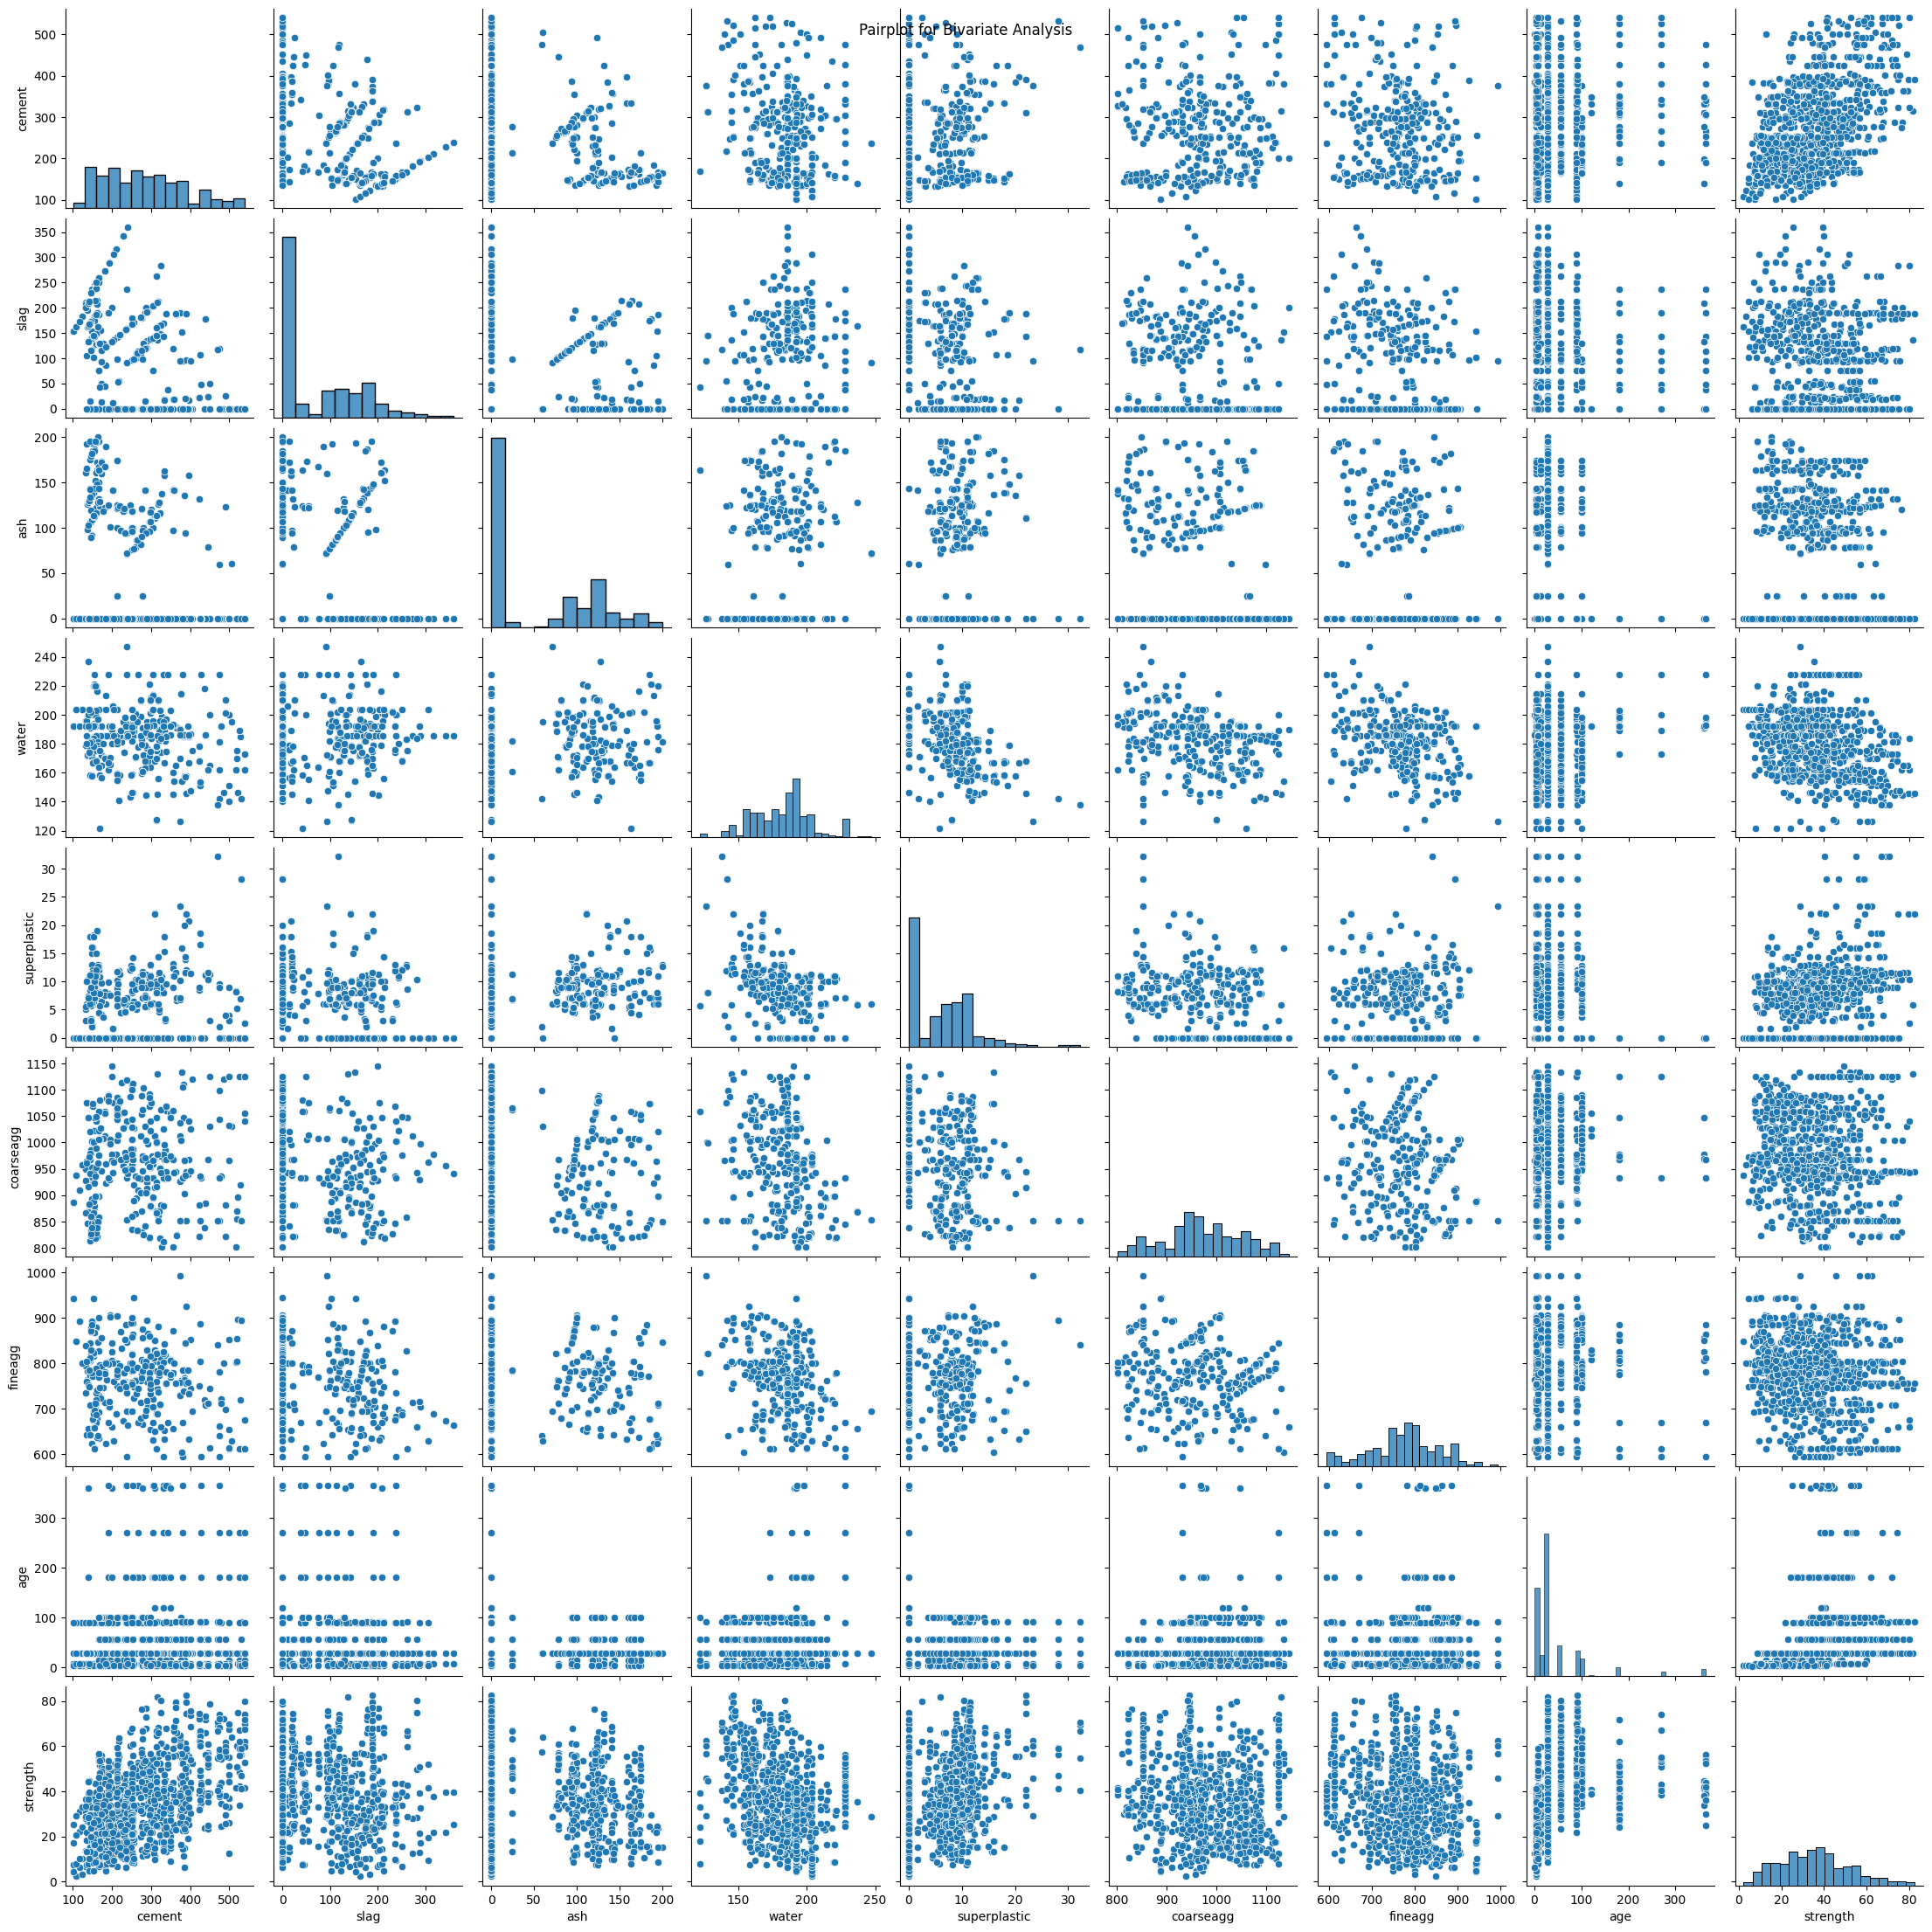

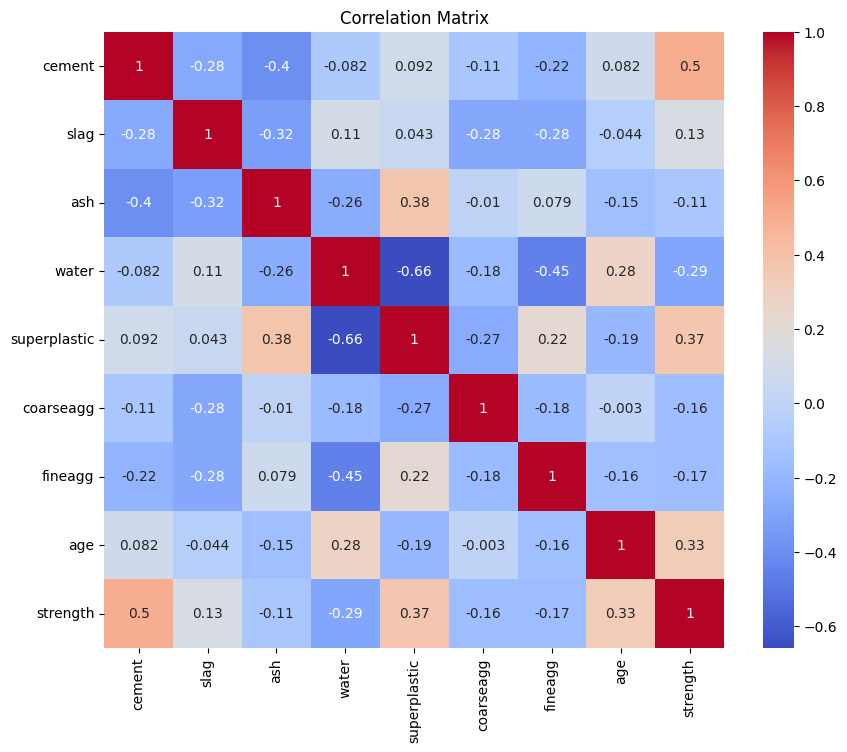

In [3]:
plt.figure(figsize=(25, 20))
plt.subplot(3, 3, 1)
plt.title('Box plot of features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.boxplot([df[feature] for feature in features], labels=features, showfliers=True)
plt.show()

for feature in features:
	plt.figure(figsize=(10, 5))
	plt.boxplot(df[feature], showfliers=True, vert=False)
	plt.title(f'Box plot of {feature}')
	plt.show()

df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.tight_layout()
plt.show()

sns.pairplot(df)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [4]:
df = df[df['water'] < 240]
df = df[df['superplastic'] < 30]
df = df[df['fineagg'] < 960]
df = df[df['age'] < 300]
df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[998 rows x 9 columns]

---

<br>

##   4\. 📊 Post-Outlier Removal Visualization

This code would generate box plots *after* the outlier removal in the previous step. Comparing these plots to those in section 3 would show the impact of removing outliers.

<br>

---

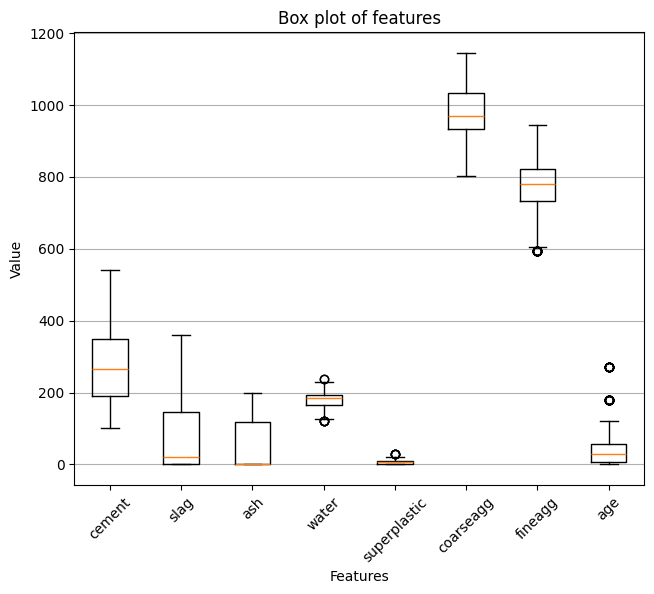

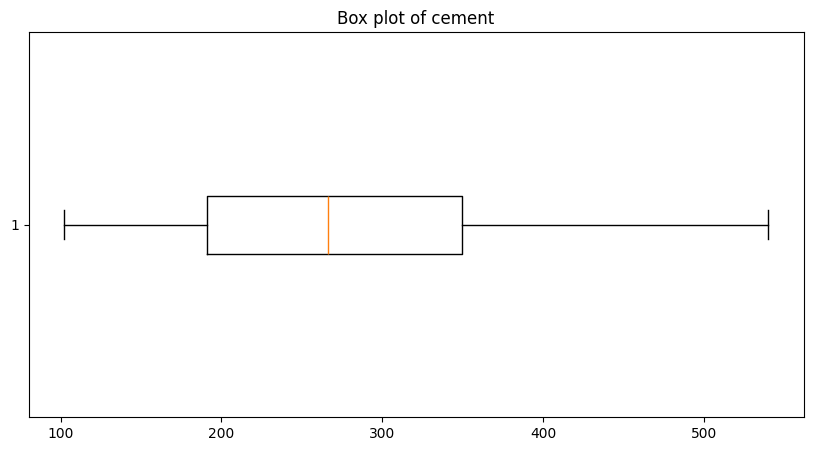

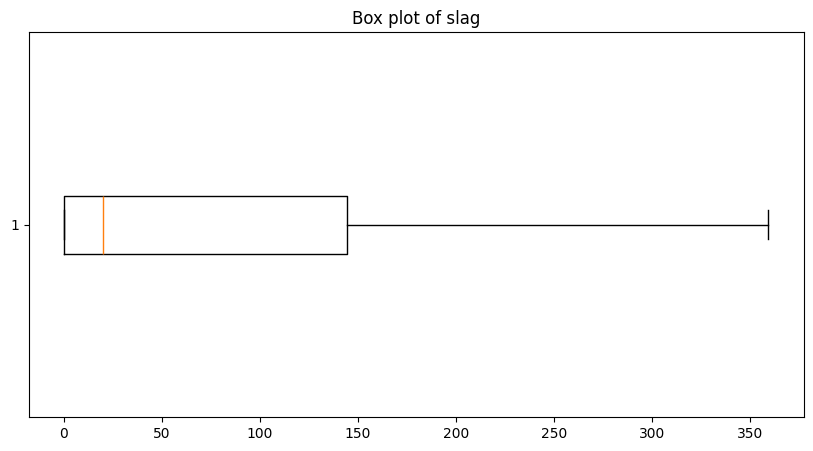

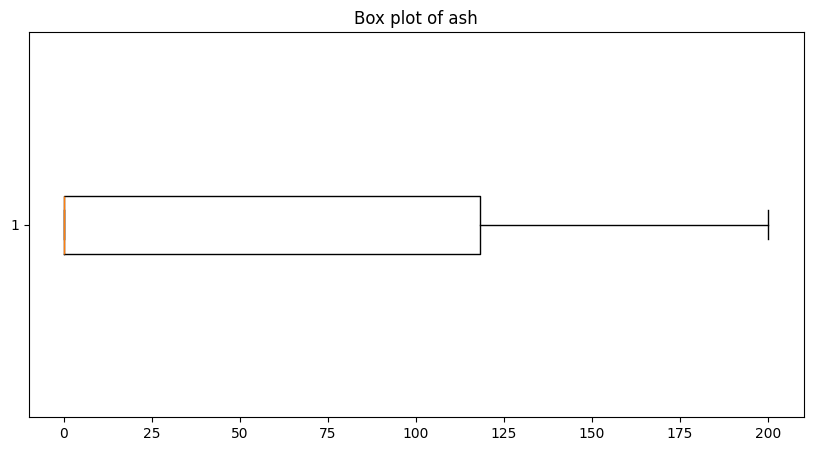

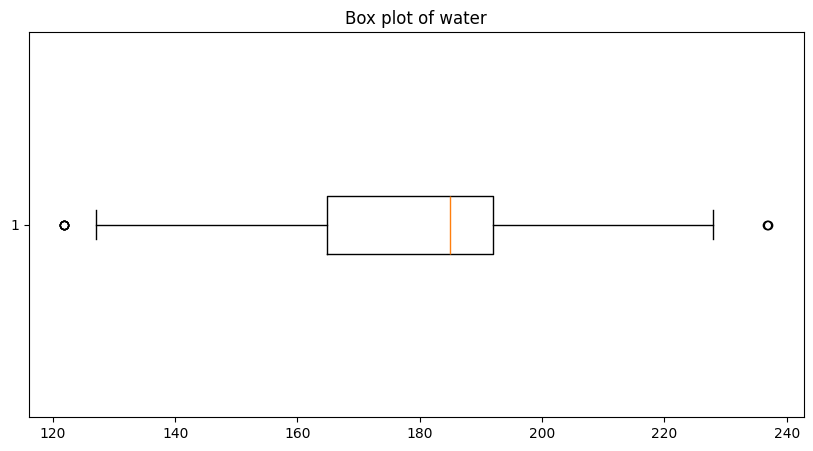

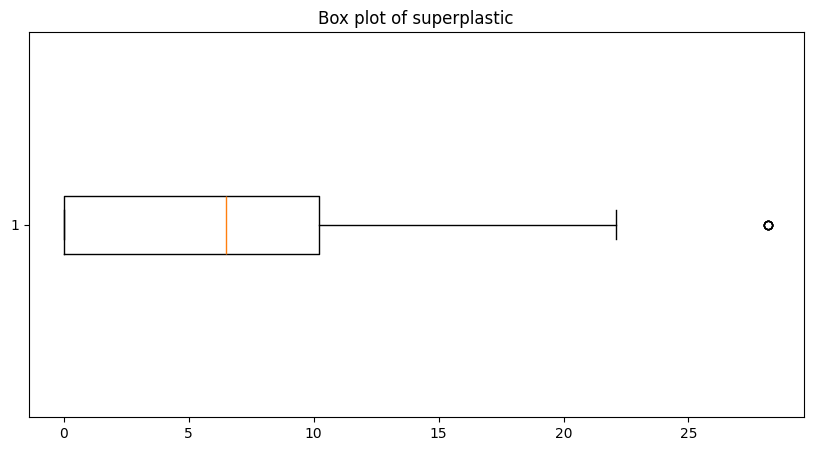

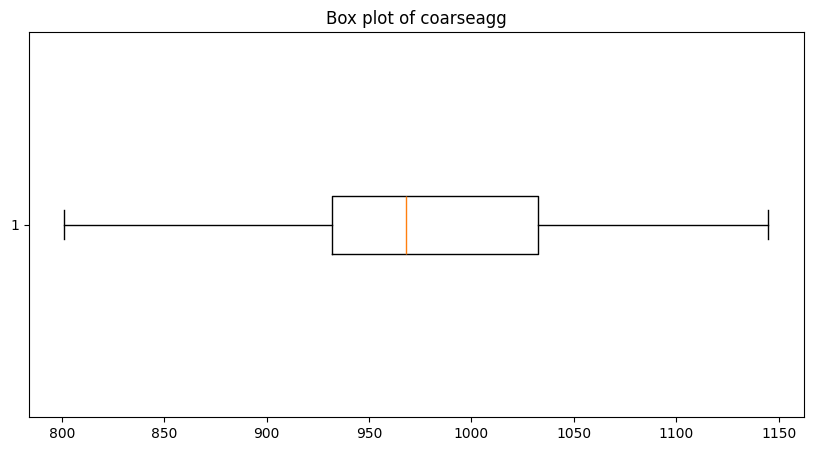

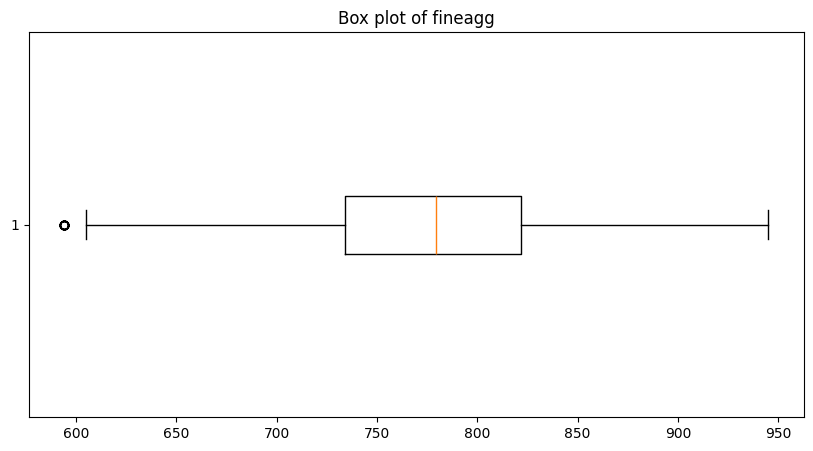

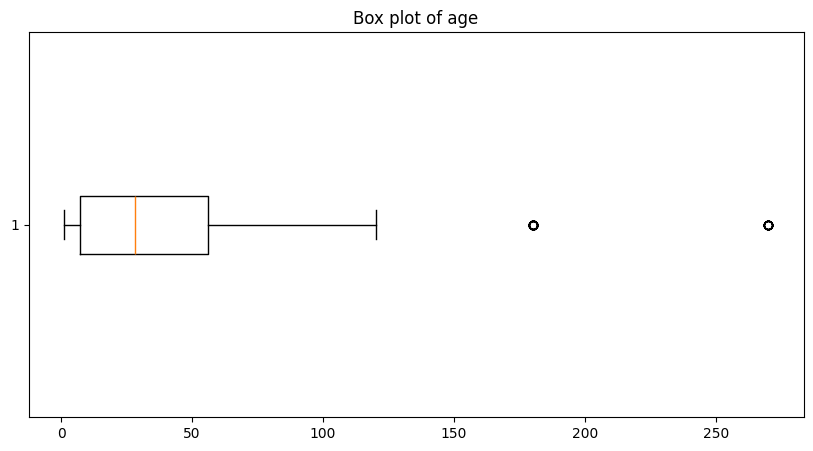

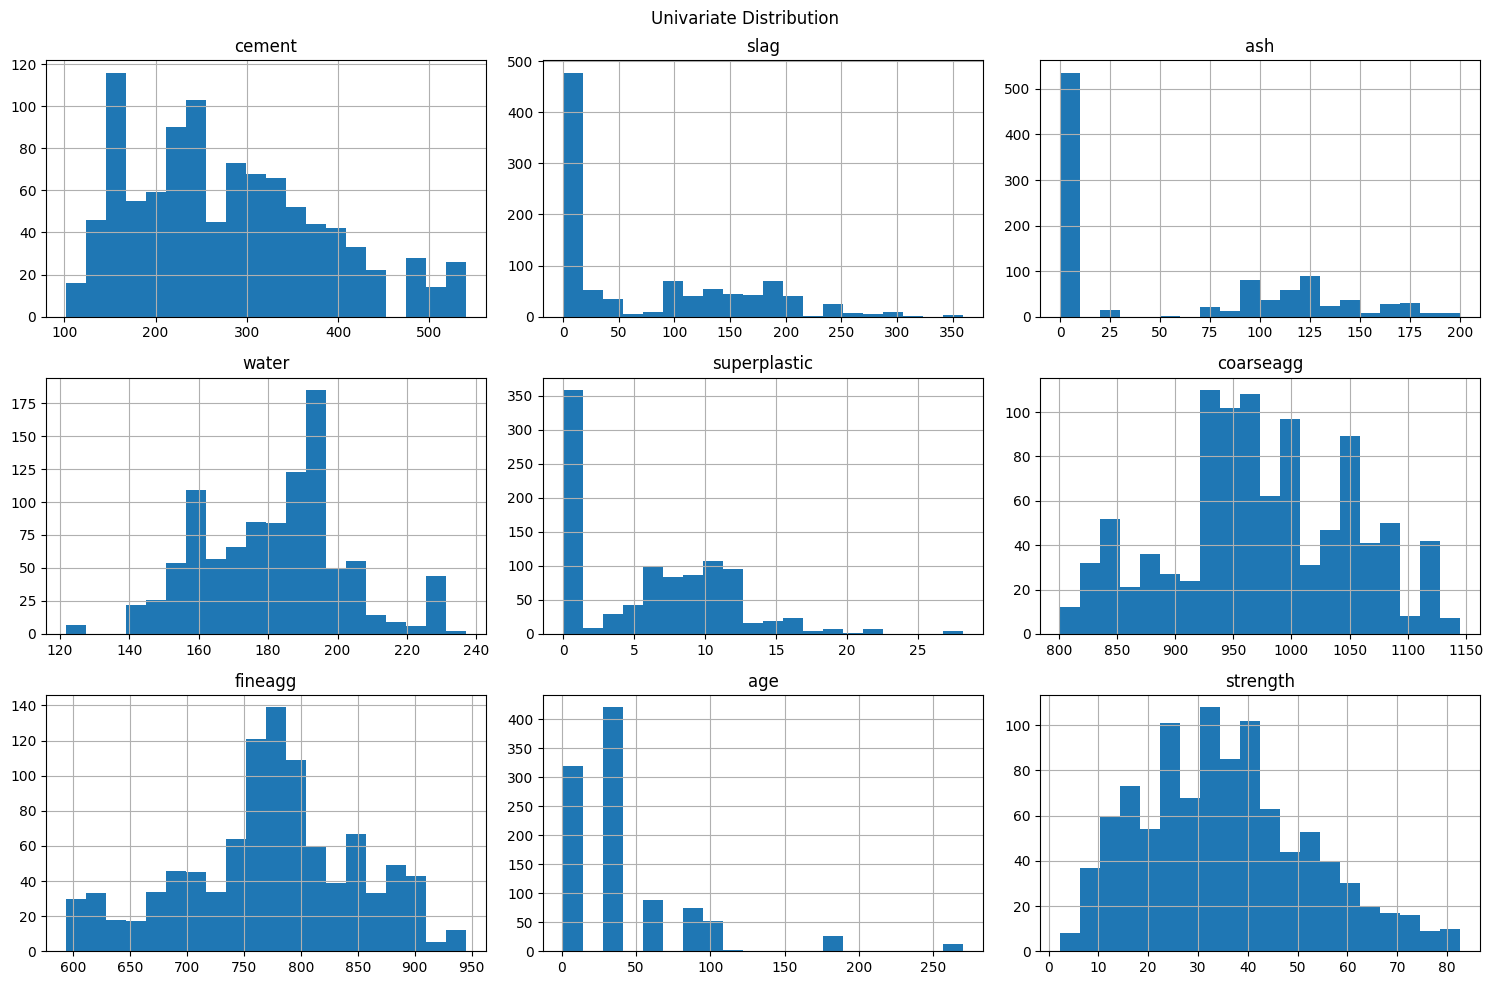

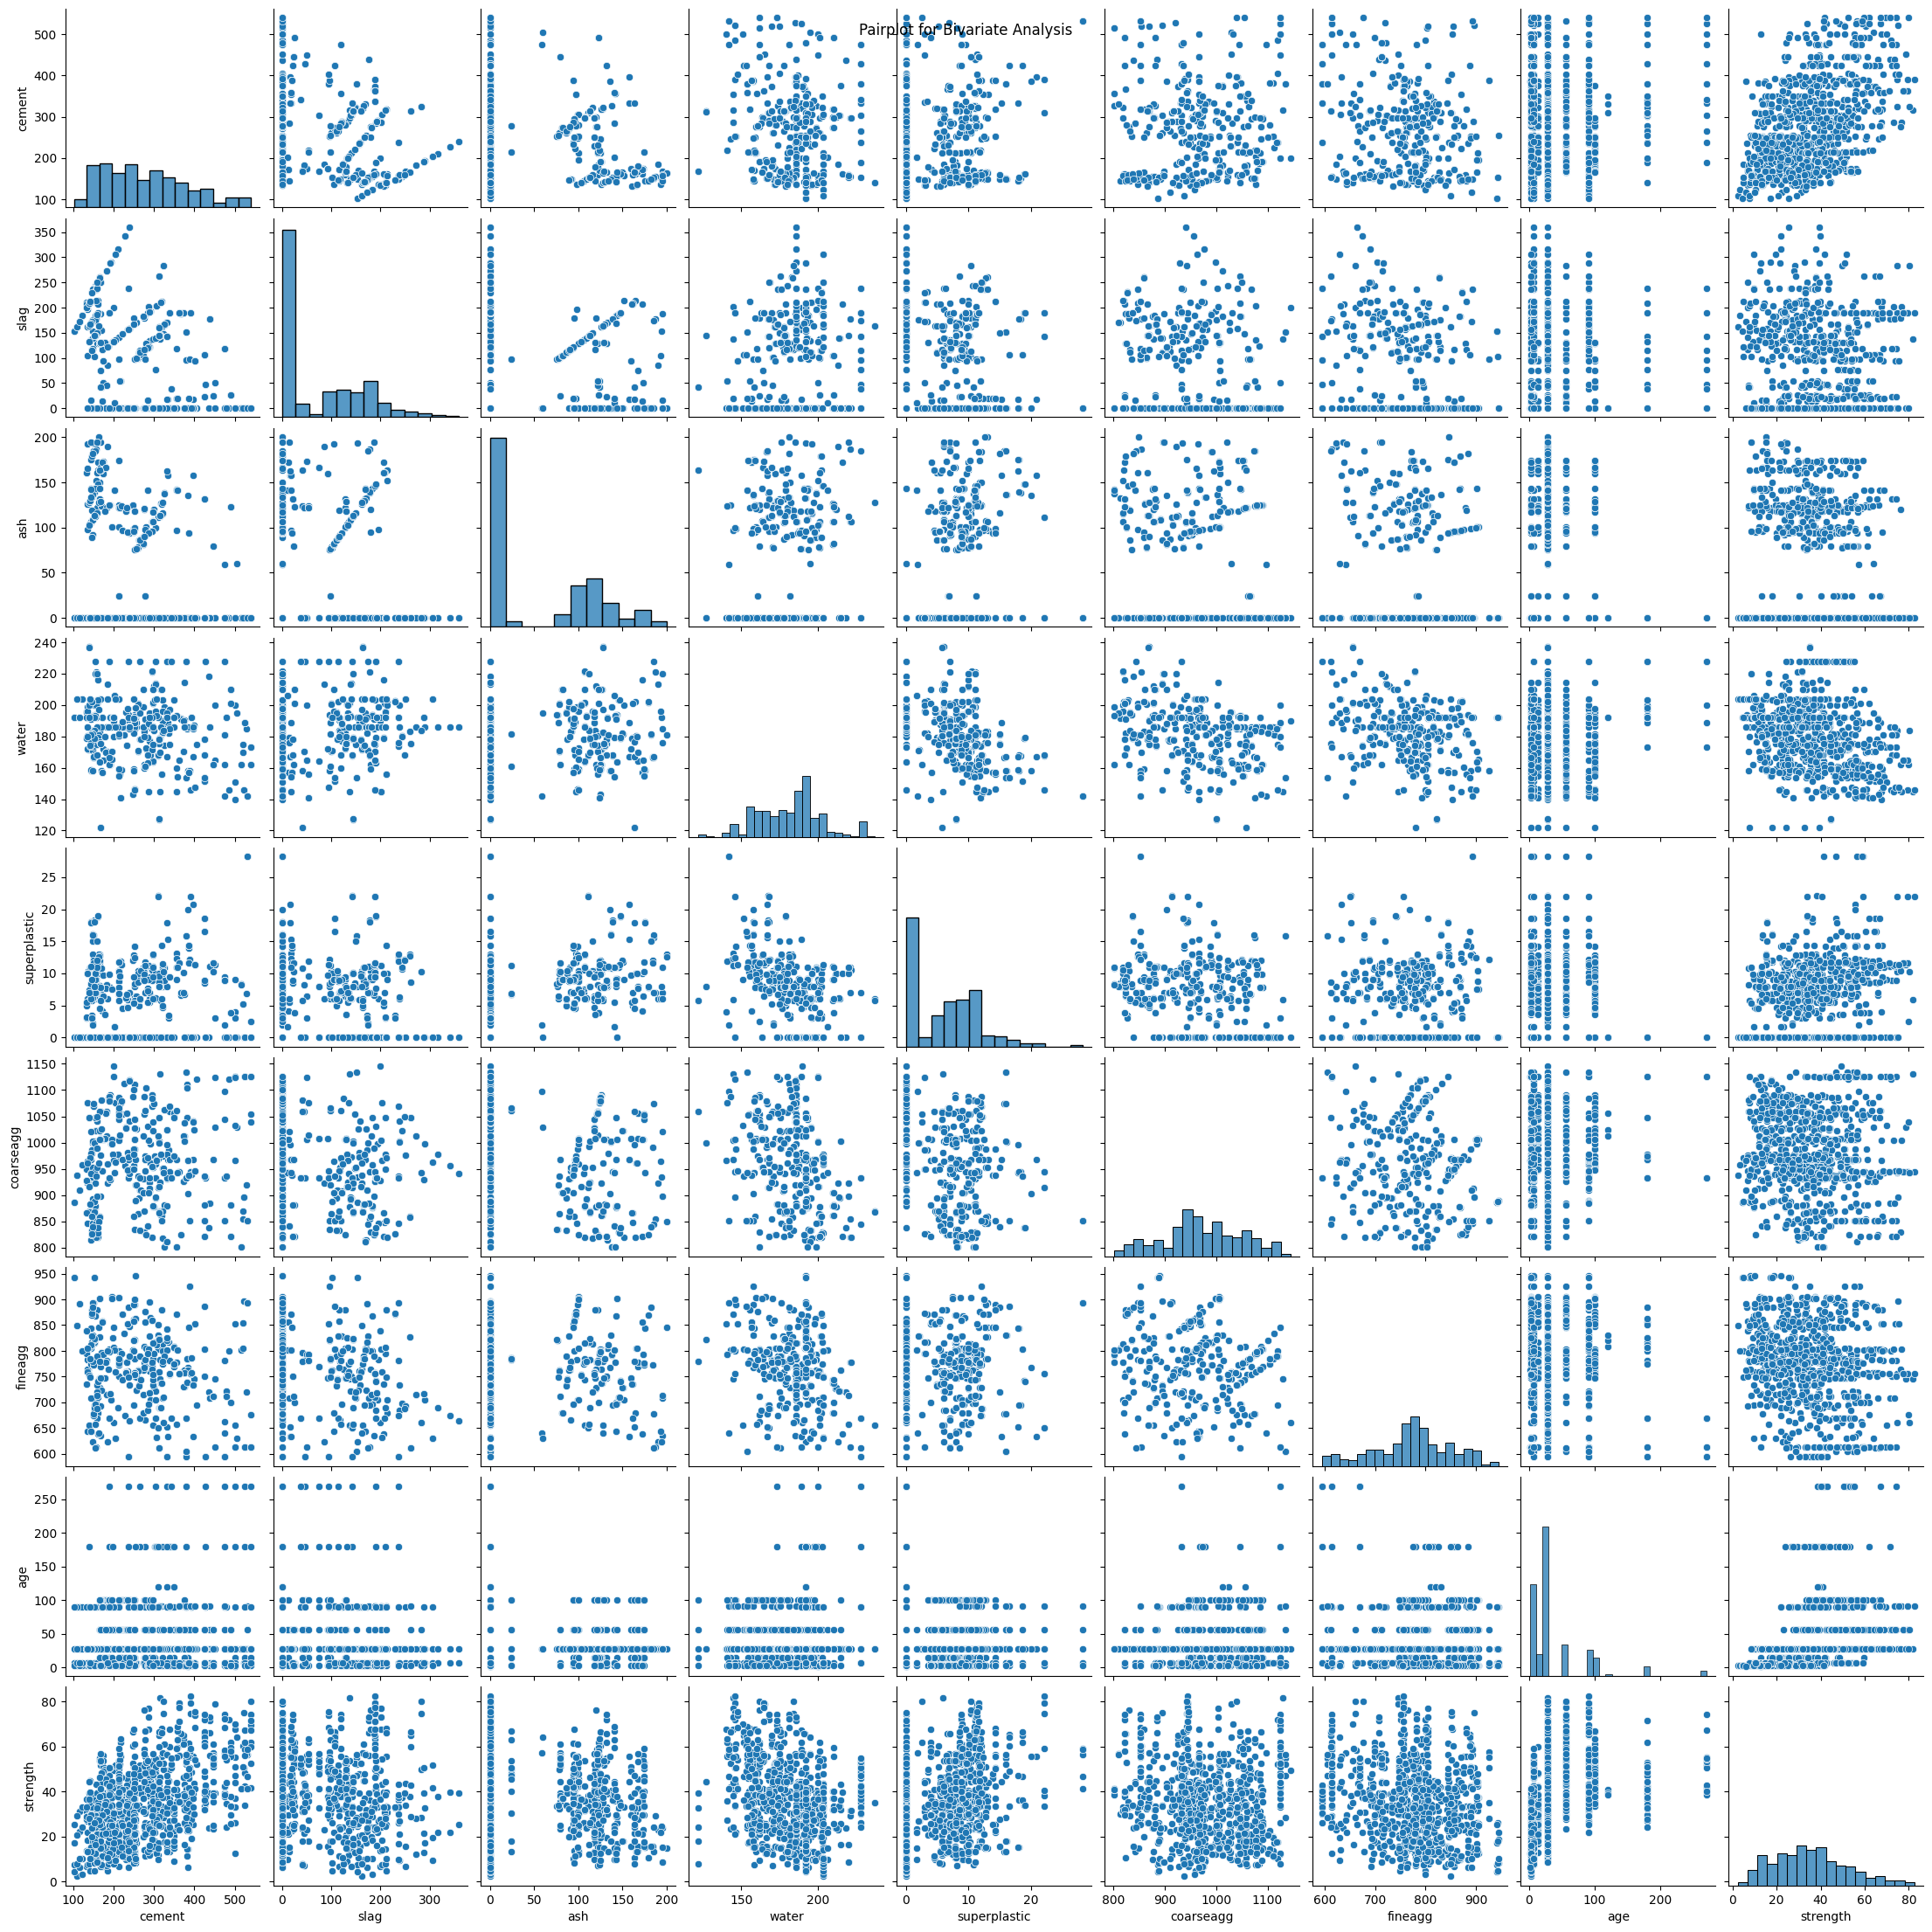

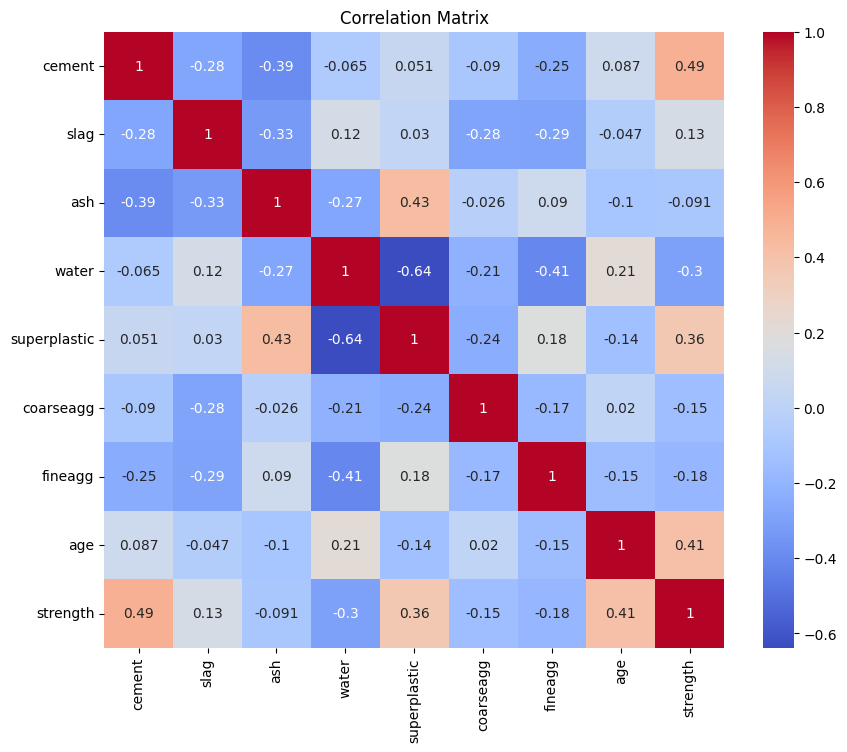

In [5]:
plt.figure(figsize=(25, 20))
plt.subplot(3, 3, 1)
plt.title('Box plot of features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.boxplot([df[feature] for feature in features], labels=features, showfliers=True)
plt.show()

for feature in features:
	plt.figure(figsize=(10, 5))
	plt.boxplot(df[feature], showfliers=True, vert=False)
	plt.title(f'Box plot of {feature}')
	plt.show()

df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.tight_layout()
plt.show()

sns.pairplot(df)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

---

<br>

##   5\. 🛠️ Feature Transformation and Data Splitting

This is a critical data preprocessing stage. First, we address skewness (asymmetry) in the data by applying a log transformation to features that exhibit high skewness.  Then, we split the data into training and testing sets. The training set is used to train the models, and the testing set is used to evaluate their performance on unseen data. Finally, we scale the numerical features using `StandardScaler`. Scaling ensures that all features contribute equally to the models.

<br>

---


In [6]:
highly_skewed_features = df[features].skew()[abs(df[features].skew()) > 0.5].index

for feature in highly_skewed_features:
    df[feature] = log1p(df[feature])

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

---

<br>

##   6\. 📊 Post-Transformation Visualization

This commented-out section would visualize the feature distributions *after* the log transformation, allowing us to see how the transformation affected the skewness.

<br>

---

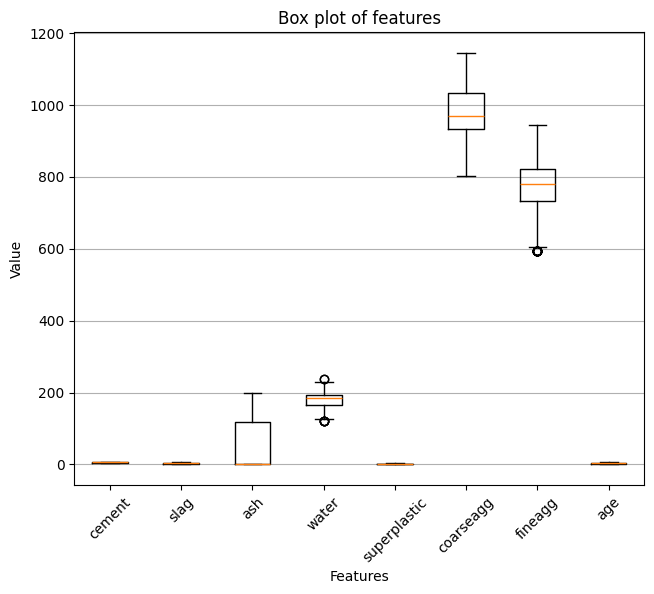

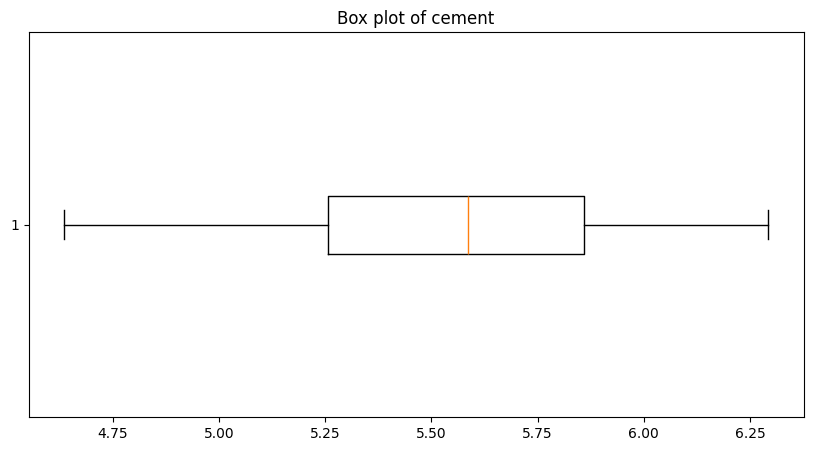

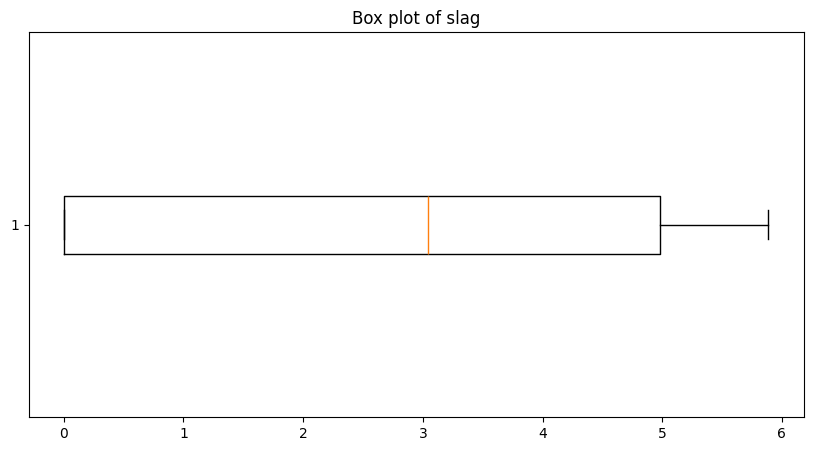

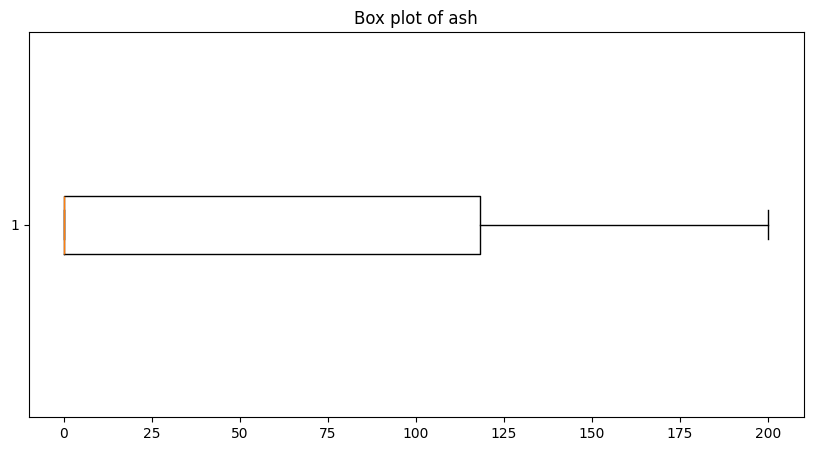

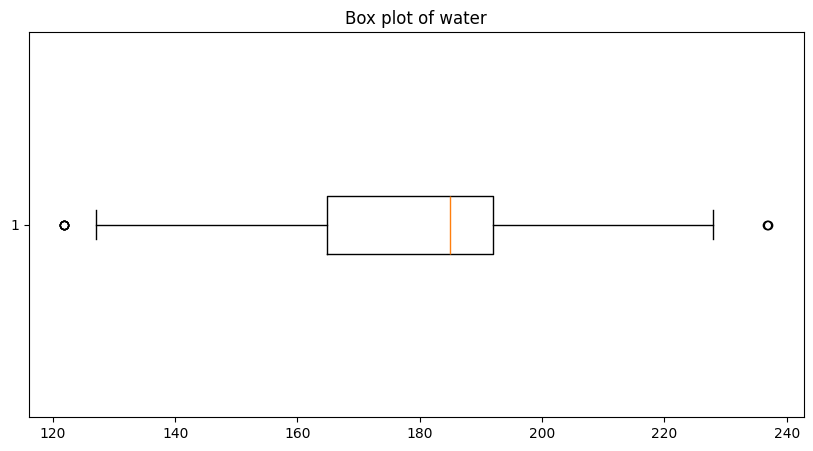

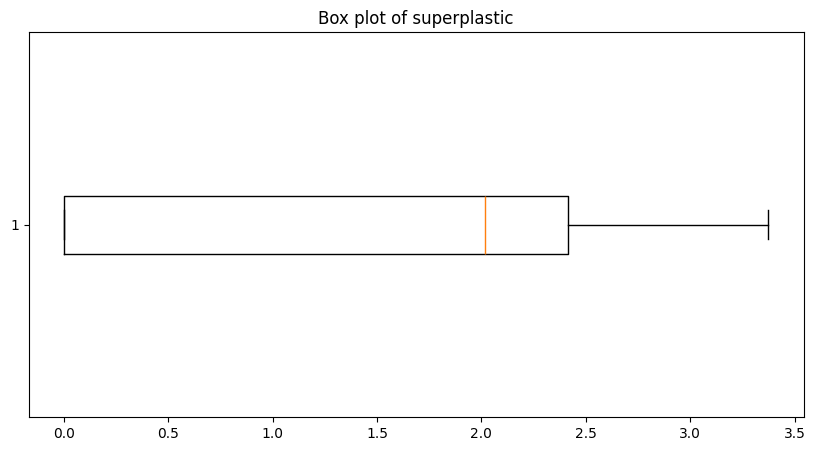

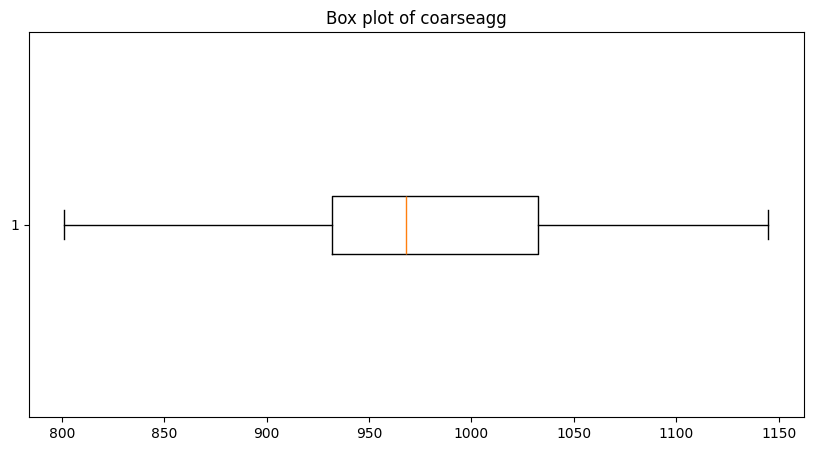

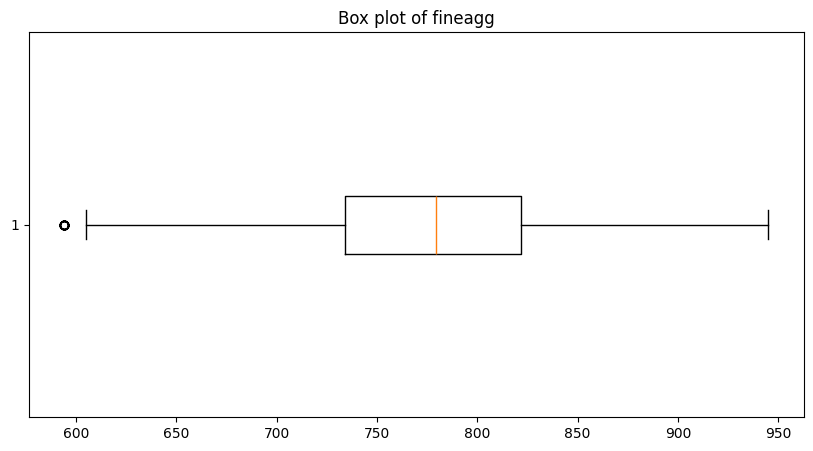

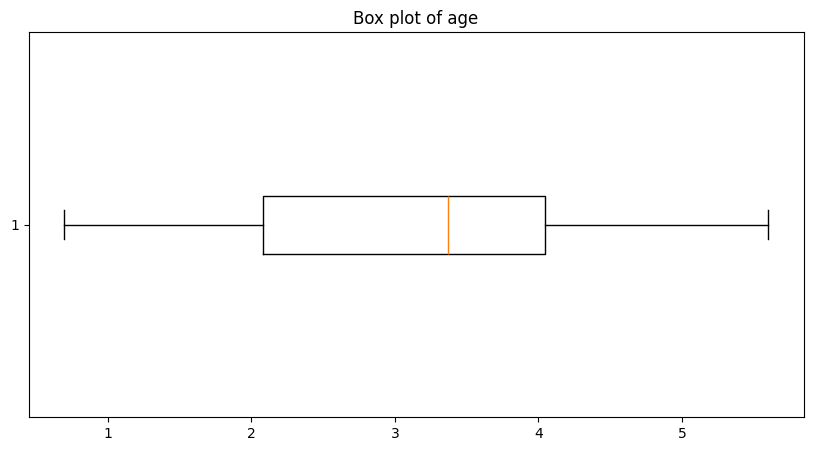

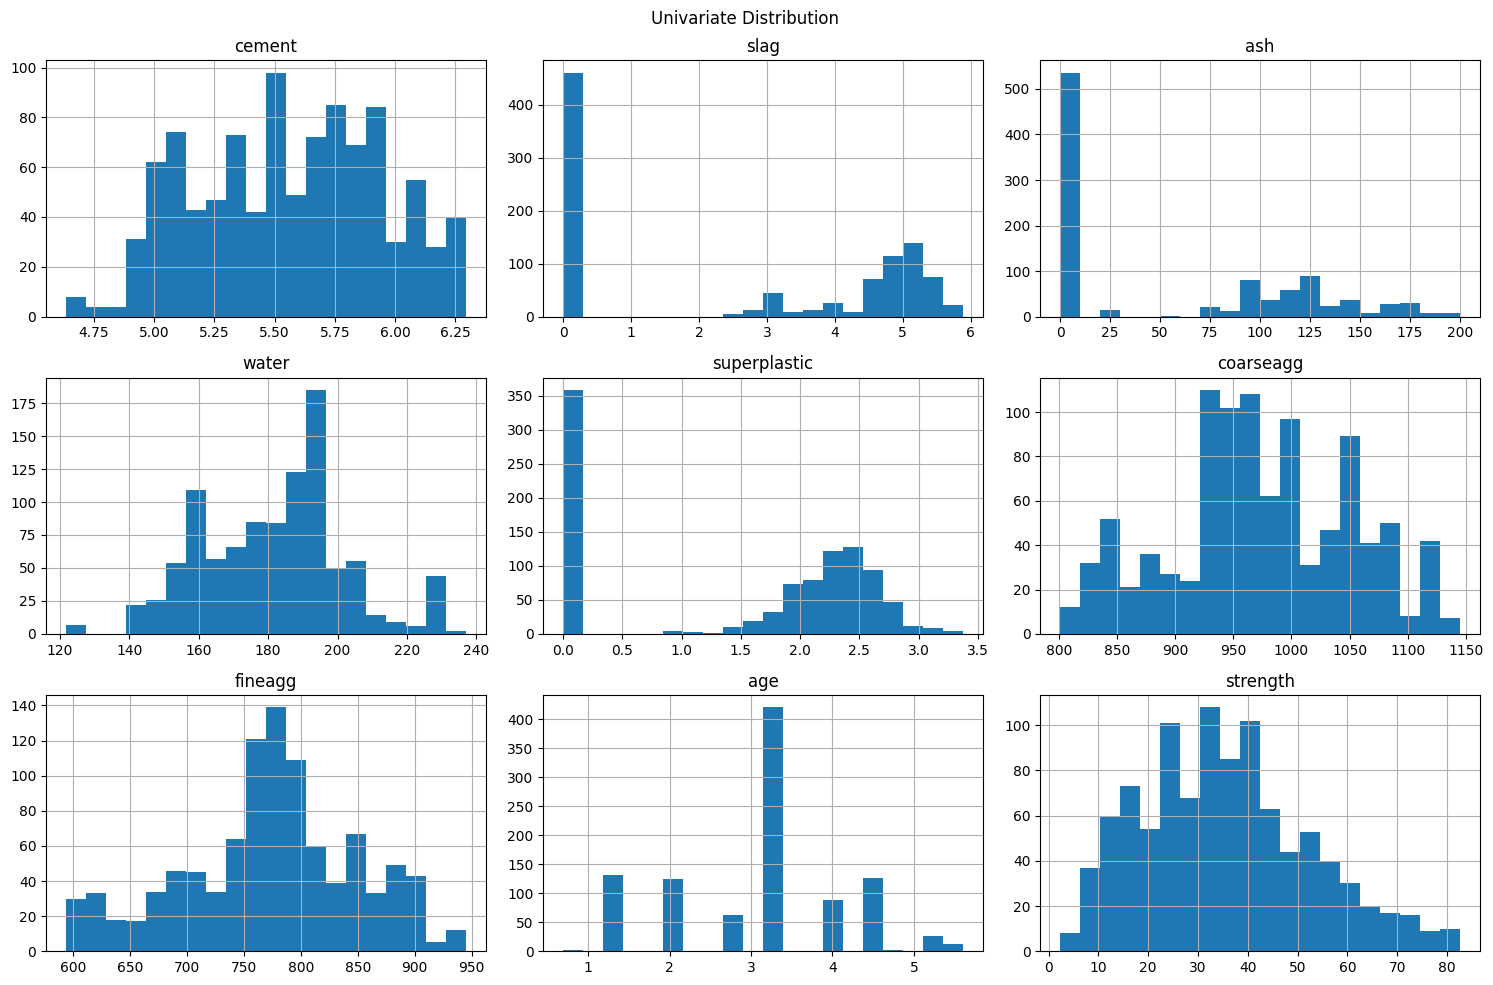

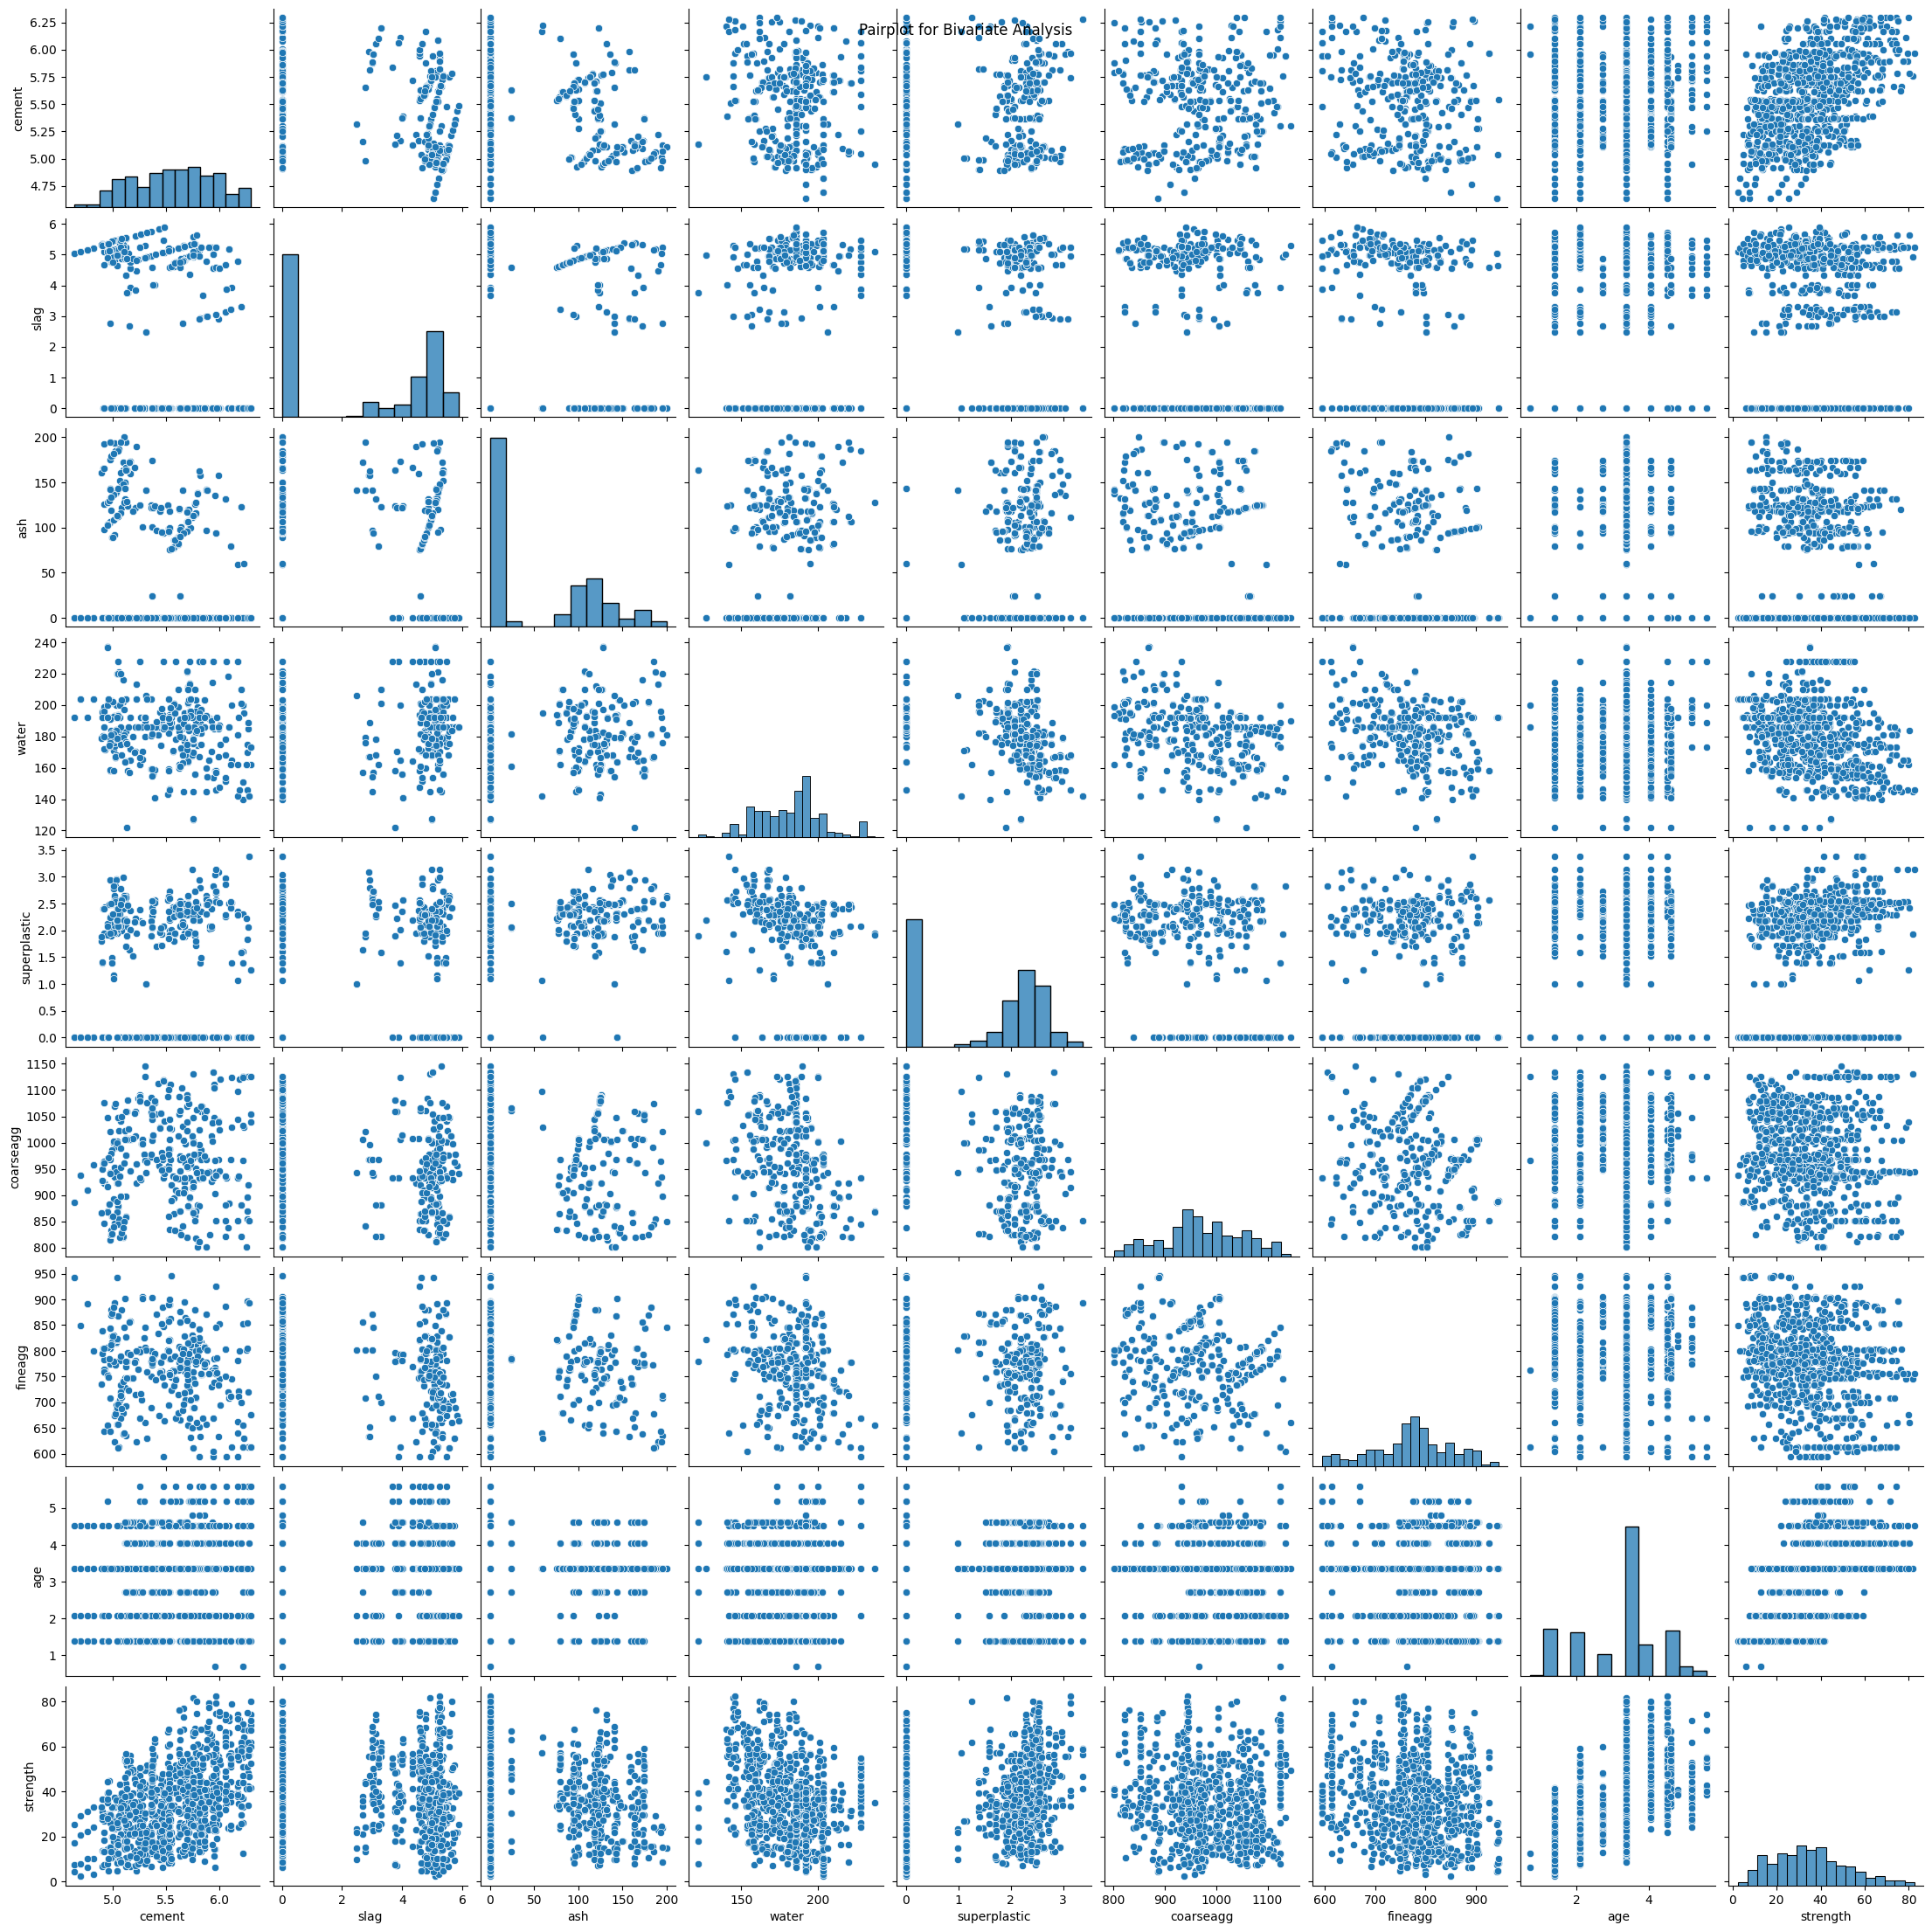

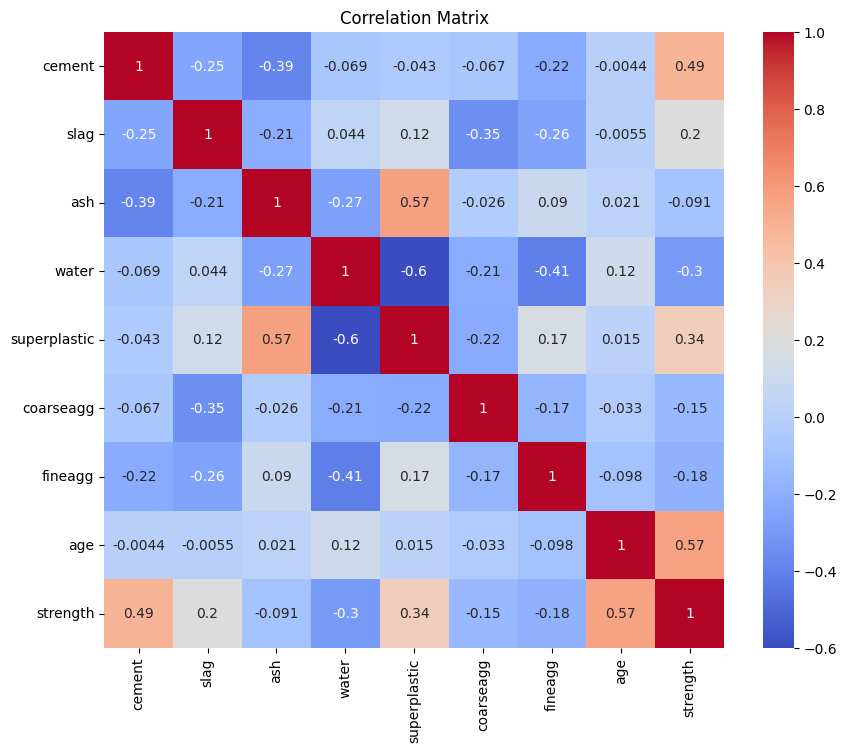

In [7]:
plt.figure(figsize=(25, 20))
plt.subplot(3, 3, 1)
plt.title('Box plot of features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.boxplot([df[feature] for feature in features], labels=features, showfliers=True)
plt.show()

for feature in features:
	plt.figure(figsize=(10, 5))
	plt.boxplot(df[feature], showfliers=True, vert=False)
	plt.title(f'Box plot of {feature}')
	plt.show()

df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.tight_layout()
plt.show()

sns.pairplot(df)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
kf = KFold(n_splits=12)
get_cvs = lambda model, xtr, ytr: list(map(lambda x: round(x*100, 3), cross_val_score(model, xtr, ytr, cv=kf, scoring='r2')))

---

<br>

##   8\. 🤖 Linear Regression Model

Here, we train a Linear Regression model. We then evaluate its performance using the R-squared metric, which measures how well the model fits the data. We calculate the R-squared on both the training and testing sets to check for overfitting (when the model performs much better on the training data than on the testing data).


<br>

---

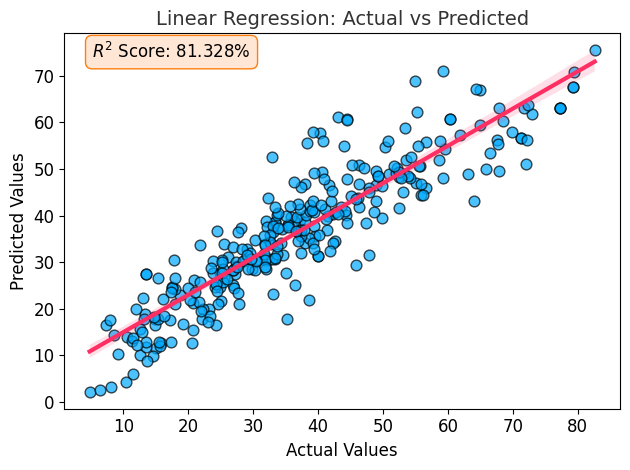

Model  Cross Validation Score   Train R²   Test R²  || Diff ||
1  Linear Regression               79.854833  81.327857  81.82655    0.498694

In [9]:
LR = LinearRegression()

LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)
y_train_pred = LR.predict(x_train)

training_r2 = LR.score(x_train, y_train) * 100
testing_r2 = LR.score(x_test, y_test) * 100

diff = abs(training_r2 - testing_r2)

scores.loc[1] = ['Linear Regression', mean(get_cvs(LR, x_train, y_train)), training_r2, testing_r2, diff]

sns.regplot(
    x=y_test, 
    y=y_pred, 
    scatter_kws={"color": "#00aaff", "s": 60, "edgecolor": "black", "alpha": 0.7}, 
    line_kws={"color": "#ff2e63", "linewidth": 3}
)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted', fontsize=14, color="#333333")

plt.text(
    0.05, 0.95, f'$R^2$ Score: {round(training_r2, 3)}%', 
    ha='left', va='center', 
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="#ff7f0e", facecolor="#ffe6d5")
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

scores

---

<br>

##   9\. 🌳 Decision Tree Regressor

This section trains and evaluates a Decision Tree Regressor. <br>
Hyperparameters (parameters that control the model's structure) such as `ccp_alpha`, `max_depth`, `max_leaf_nodes`, and `min_samples_split` are set to influence the tree's complexity.

<br>

---

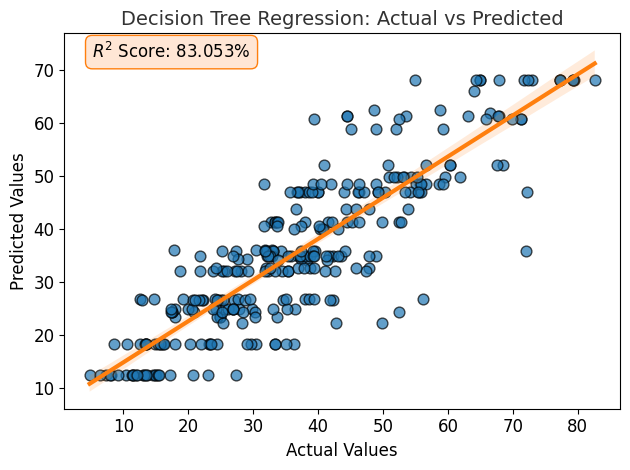

Model  Cross Validation Score   Train R²    Test R²  \
1         Linear Regression               79.854833  81.327857  81.826550   
2  Decision Tree Regression               69.619917  83.052566  75.101176   

   || Diff ||  
1    0.498694  
2    7.951390

In [10]:
DTR = DecisionTreeRegressor(ccp_alpha=0.689, max_depth=80, max_leaf_nodes=87, min_samples_split=26, max_features=4)

DTR.fit(x_train, y_train)

y_pred = DTR.predict(x_test)
y_train_pred = DTR.predict(x_train)

training_r2 = DTR.score(x_train, y_train) * 100
testing_r2 = DTR.score(x_test, y_test) * 100

diff = abs(training_r2 - testing_r2)

scores.loc[2] = ['Decision Tree Regression', mean(get_cvs(DTR, x_train, y_train)),training_r2, testing_r2, diff]

sns.regplot(
    x=y_test, 
    y=y_pred, 
    scatter_kws={"color": "#1f77b4", "s": 60, "edgecolor": "black", "alpha": 0.7}, 
    line_kws={"color": "#ff7f0e", "linewidth": 3}
)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Decision Tree Regression: Actual vs Predicted', fontsize=14, color="#333333")

plt.text(
    0.05, 0.95, f'$R^2$ Score: {round(training_r2, 3)}%', 
    ha='left', va='center', 
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="#ff7f0e", facecolor="#ffe6d5")
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

scores

---

<br>

##   10\. 🌲 Random Forest and XGBoost Regressors

This part explores more advanced models: Random Forest and XGBoost. <br>
These are ensemble methods, which combine multiple simpler models to make more accurate predictions. Hyperparameters are again used to tune the models.

<br>

---

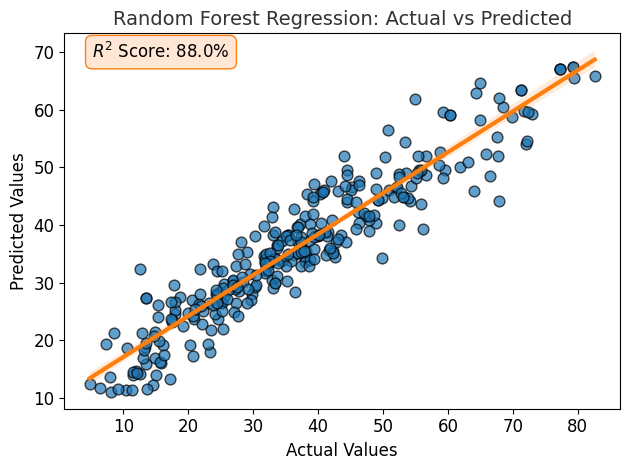

Model  Cross Validation Score   Train R²    Test R²  \
1         Linear Regression               79.854833  81.327857  81.826550   
2  Decision Tree Regression               69.619917  83.052566  75.101176   
3  Random Forest Regression               81.164833  87.999593  85.059922   

   || Diff ||  
1    0.498694  
2    7.951390  
3    2.939672

In [11]:
RFR = RandomForestRegressor(n_estimators=825, min_samples_split=8, min_samples_leaf=8, max_features=0.49, bootstrap=True, oob_score=True)

RFR.fit(x_train, y_train)

y_pred = RFR.predict(x_test)
y_train_pred = RFR.predict(x_train)

training_r2 = RFR.score(x_train, y_train) * 100
testing_r2 = RFR.score(x_test, y_test) * 100

diff = abs(training_r2 - testing_r2)

scores.loc[3] = ['Random Forest Regression', mean(get_cvs(RFR, x_train, y_train)),training_r2, testing_r2, diff]

sns.regplot(
    x=y_test, 
    y=y_pred, 
    scatter_kws={"color": "#1f77b4", "s": 60, "edgecolor": "black", "alpha": 0.7}, 
    line_kws={"color": "#ff7f0e", "linewidth": 3}
)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Random Forest Regression: Actual vs Predicted', fontsize=14, color="#333333")

plt.text(
    0.05, 0.95, f'$R^2$ Score: {round(training_r2, 3)}%', 
    ha='left', va='center', 
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="#ff7f0e", facecolor="#ffe6d5")
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

scores

---

<br>

##   12\. ⚙️ Support Vector Regression (SVR)

This part demonstrates training and evaluating a Support Vector Regression (SVR) model. SVR is another powerful regression technique. <br>
Hyperparameters like `C`, `gamma`, and `epsilon` are tuned to control the model's behavior.

<br>

---

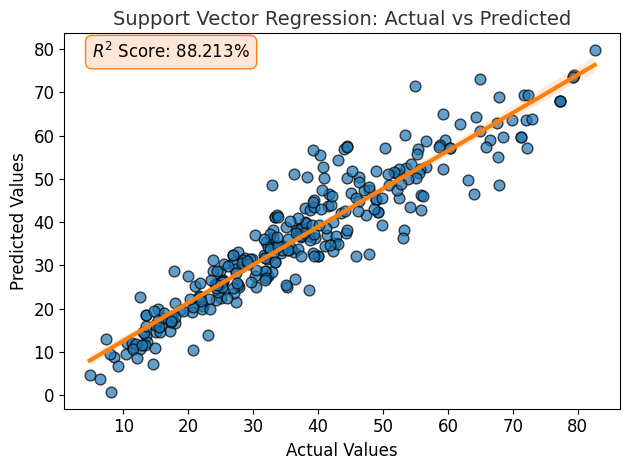

Model  Cross Validation Score   Train R²    Test R²  \
1          Linear Regression               79.854833  81.327857  81.826550   
2   Decision Tree Regression               69.619917  83.052566  75.101176   
3   Random Forest Regression               81.164833  87.999593  85.059922   
4  Support Vector Regression               85.489667  88.213014  87.681997   

   || Diff ||  
1    0.498694  
2    7.951390  
3    2.939672  
4    0.531017

In [12]:
SVM = SVR(C=410, gamma=0.01, epsilon=0.06)

SVM.fit(x_train, y_train)

y_pred = SVM.predict(x_test)
y_train_pred = SVM.predict(x_train)

training_r2 = SVM.score(x_train, y_train) * 100
testing_r2 = SVM.score(x_test, y_test) * 100

diff = abs(training_r2 - testing_r2)

scores.loc[4] = ['Support Vector Regression', mean(get_cvs(SVM, x_train, y_train)),training_r2, testing_r2, diff]

sns.regplot(
    x=y_test, 
    y=y_pred, 
    scatter_kws={"color": "#1f77b4", "s": 60, "edgecolor": "black", "alpha": 0.7}, 
    line_kws={"color": "#ff7f0e", "linewidth": 3}
)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Support Vector Regression: Actual vs Predicted', fontsize=14, color="#333333")

plt.text(
    0.05, 0.95, f'$R^2$ Score: {round(training_r2, 3)}%', 
    ha='left', va='center', 
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="#ff7f0e", facecolor="#ffe6d5")
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

scores

---

<br>

##   13\. 👯‍♀️ K-Nearest Neighbors (KNN)

<li>This final section repeats the training and evaluation of KNN.
<li> Comparing the results from different runs is essential for model selection.

<br>
<br>
<br>

---

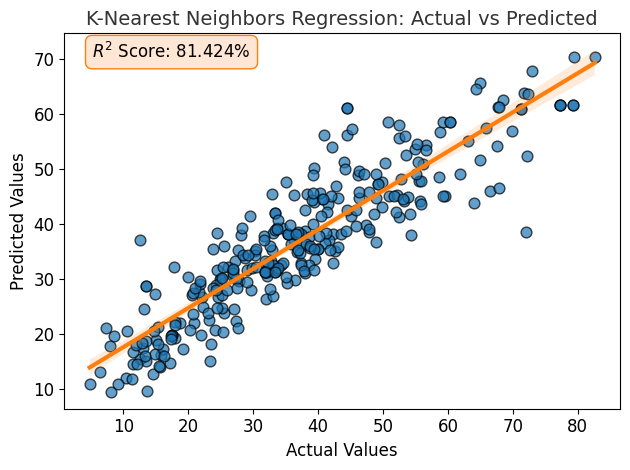

Model  Cross Validation Score   Train R²  \
1               Linear Regression               79.854833  81.327857   
2        Decision Tree Regression               69.619917  83.052566   
3        Random Forest Regression               81.164833  87.999593   
4       Support Vector Regression               85.489667  88.213014   
5  K-Nearest Neighbors Regression               77.283583  81.423613   

     Test R²  || Diff ||  
1  81.826550    0.498694  
2  75.101176    7.951390  
3  85.059922    2.939672  
4  87.681997    0.531017  
5  80.158281    1.265333

In [13]:
KNN = KNeighborsRegressor(algorithm='auto', metric='minkowski', p=2, leaf_size=65, n_neighbors=15)

KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_test)
y_train_pred = KNN.predict(x_train)

training_r2 = KNN.score(x_train, y_train) * 100
testing_r2 = KNN.score(x_test, y_test) * 100

diff = abs(training_r2 - testing_r2)

scores.loc[5] = ['K-Nearest Neighbors Regression', mean(get_cvs(KNN, x_train, y_train)),training_r2, testing_r2, diff]

sns.regplot(
    x=y_test, 
    y=y_pred, 
    scatter_kws={"color": "#1f77b4", "s": 60, "edgecolor": "black", "alpha": 0.7}, 
    line_kws={"color": "#ff7f0e", "linewidth": 3}
)

plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('K-Nearest Neighbors Regression: Actual vs Predicted', fontsize=14, color="#333333")

plt.text(
    0.05, 0.95, f'$R^2$ Score: {round(training_r2, 3)}%', 
    ha='left', va='center', 
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.4", edgecolor="#ff7f0e", facecolor="#ffe6d5")
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

scores

### 📊 **Model Evaluation Summary**

| Model | Train R² | Test R² | Absolute Difference |
|----------------------|----------|---------|------------|
| Linear Regression | 81.328% |	81.826% | 0.498 |
| Decision Tree Regression | 83.991 | 76.276 | 7.715 |
| Random Forest Regression | 87.964 | 85.152 | 2.812 |
| Support Vector Regression | 88.213 | 87.682 | 0.531 |
| K-Nearest Neighbors Regression | 81.424 | 80.158 | 1.266 |

---

### 🧠 **Inference**

- 🔹 **Linear Regression** shows good generalization with a small gap between training and test R².
- 🌳 **Decision Tree** performs well on training data but has a larger drop on test data, indicating **overfitting**.
- 🌲 **Random Forest** balances high performance with improved generalization over a single tree — a **robust** model.
- 📈 **Support Vector Regressor (SVR)** maintains consistent R² scores, indicating **stable generalization**.
- 👥 **K-Nearest Neighbors** performs decently but might be sensitive to data scaling and choice of `k`.

> 📌 **Conclusion**:  
> ✅ **Random Forest** emerges as the most balanced model — high training performance and strong generalization.  
> ⚠️ **Decision Tree** may need pruning or parameter tuning to avoid overfitting.  
> 💡 Consider **SVR or Linear Regression** if interpretability and consistency are key.



## 🔍 Feature Characteristics & Insights

### 📈 Strong correlation expected:
- **Cement and Age** usually have positive correlation with strength.
- **Too much Water** typically shows negative correlation (weakens concrete).
- **Superplasticizer** often helps improve strength by reducing water demand.

### 🧮 Mostly numerical:
- All features are continuous, which makes them ideal for regression models.

### 🔄 Some nonlinear relationships:
- e.g., **Age vs Strength** curve tends to flatten over time — this is why models like **SVR** and **Random Forest** do better than pure **Linear Regression**.

### 📉 Multicollinearity may exist:
- **Cement**, **slag**, and **fly ash** might substitute each other — linear models might suffer slightly unless regularization is used.

## 🤖 Why Models Performed as They Did
- **SVR** and **Random Forest** performed best because they capture non-linear and complex interactions.
- **Decision Tree** overfitted likely due to lack of regularization.
- **Linear Regression** did okay because the dataset still holds some linear structure.
- **KNN** did fairly well but may suffer when feature distributions vary widely (e.g., Cement vs Superplasticizer values).

# 🖊️ Author

_“A Classification Project by Zaid. N. Ansari”_ ✨

---